In [1]:
# if does not have pandas, try: conda install pandas
import pandas as pd
import pytraj as pt

In [2]:
traj = pt.iterload('tz2.nc', 'tz2.parm7')
print(traj)

pytraj.TrajectoryIterator, 101 frames: 
Size: 0.000503 (GB)
<Topology: 223 atoms, 13 residues, 1 mols, non-PBC>
           


### Convert to panda's DataFrame

In [3]:
energies = pt.energy_decomposition(traj, igb=8)

# convert energies (dict) to pandas' DataFrame

df = pd.DataFrame(energies)
df.head()

,disp,polar,surf,elec_14,elec,angle_ub,angle,bond,hbond,emap,...,dihedral,vdw_14,dvdl,vdw,noe,amd_boost,tot,les,gb,scf
0,0,0,0,720.659233,-781.595599,0,128.545148,0.015314,0,0,...,111.611329,52.557611,0,-44.981184,0,0,-225.720813,0,-412.532664,0
1,0,0,0,731.533534,-807.489134,0,105.064945,0.013582,0,0,...,105.392413,50.034997,0,-43.770307,0,0,-259.310392,0,-400.090422,0
2,0,0,0,717.354406,-741.175340,0,103.520284,0.012521,0,0,...,93.030850,54.298550,0,-52.335899,0,0,-265.221642,0,-439.927013,0
3,0,0,0,735.393666,-804.358857,0,94.560780,0.016334,0,0,...,105.522288,47.862884,0,-52.486528,0,0,-274.445708,0,-400.956276,0
4,0,0,0,735.440077,-797.075840,0,99.508124,0.013338,0,0,...,105.850222,52.043840,0,-50.893009,0,0,-259.174278,0,-404.061030,0


### get some stats

In [4]:

df.describe()

,disp,polar,surf,elec_14,elec,angle_ub,angle,bond,hbond,emap,...,dihedral,vdw_14,dvdl,vdw,noe,amd_boost,tot,les,gb,scf
count,101,101,101,101.000000,101.000000,101,101.000000,101.000000,101,101,...,101.000000,101.000000,101,101.000000,101,101,101.000000,101,101.000000,101
mean,0,0,0,733.147711,-811.949931,0,99.571031,0.015159,0,0,...,96.511025,50.037658,0,-55.154436,0,0,-280.309465,0,-392.487683,0
std,0,0,0,7.894664,17.744617,0,7.700956,0.001460,0,0,...,5.634203,2.373649,0,5.627266,0,0,11.238574,0,14.710022,0
min,0,0,0,714.936095,-851.957120,0,82.169490,0.012096,0,0,...,83.260357,44.417787,0,-70.793747,0,0,-304.416297,0,-439.927013,0
25%,0,0,0,727.801282,-822.654166,0,94.716340,0.014186,0,0,...,92.274517,48.360136,0,-58.042714,0,0,-286.997153,0,-402.303297,0
50%,0,0,0,733.130563,-813.052783,0,99.508124,0.014978,0,0,...,96.520164,50.034997,0,-54.086102,0,0,-280.839953,0,-391.854334,0
75%,0,0,0,738.629481,-803.334430,0,103.520284,0.015962,0,0,...,99.858045,51.284565,0,-51.655409,0,0,-273.232476,0,-382.291285,0
max,0,0,0,751.059170,-741.175340,0,128.545148,0.019445,0,0,...,111.611329,55.377881,0,-43.770307,0,0,-225.720813,0,-363.345464,0


### plot GB energies

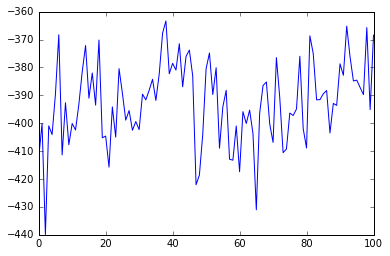

In [5]:
%matplotlib inline

df['gb'].plot()

### compute rmsd to 1st frame and add rmsd to DataFrame

In [6]:
tz_rmsd = pt.rmsd(traj, ref=0, mask='@CA')
print(tz_rmsd)

df['rmsd'] = pd.Series(tz_rmsd)
df['rmsd'].head()

[  1.94667955e-07   2.54596866e+00   4.22333034e+00 ...,   4.97189564e+00
   5.53947712e+00   4.83201237e+00]


0    1.946680e-07
1    2.545969e+00
2    4.223330e+00
3    3.464763e+00
4    3.339562e+00
Name: rmsd, dtype: float64

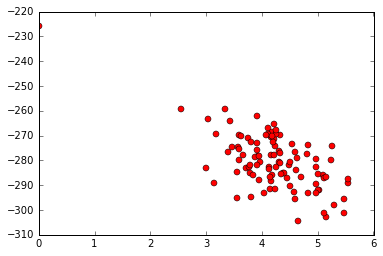

In [7]:
### plot tot energy vs rmsd

from matplotlib import pyplot as plt

plt.plot(df['rmsd'], df['tot'], 'ro')

### save DataFrame to CSV format

In [8]:
df.to_csv('data.csv')

# other formats